In [141]:
import numpy as np
import matplotlib.pyplot as plt
import random

<h2>Game modeling</h2>

In [114]:
possible_states = np.matrix([[0,0,0,0,1,1],
                            [1,0,1,0,1,0],
                            [1,1,1,1,1,0],
                            [0,0,0,0,1,0],
                            [0,0,0,0,1,0]])
def is_valid(a,pos,ori):
    x,y = pos
    if ori==0:
        return (x-1 >= 0) and possible_states[(x-1,y)]
    elif ori==1:
        return (y+1 <= 5) and possible_states[(x,y+1)]
    elif ori==2:
        return (x+1 <= 4) and possible_states[(x+1,y)]
    else:
        return (y-1 >= 0) and possible_states[(x,y-1)]

def take_action(a,pos,ori):
    x,y = pos
    if a==0: #turn
        position = pos
        orientation = (ori + 1) %4
    else: #go forward
        orientation = ori
        if ori==0:
            position = (x-1,y)
        elif ori==1:
            position = (x,y+1)
        elif ori==2:
            position = (x+1,y)
        else:
            position = (x,y-1)
    return position,orientation

bad_states_list = [(1,0),(1,2),(4,4)]
def evaluate_cost(pos):
    if pos in bad_states_list:
        return -50
    if pos==(0,5):
        return 1000
    return 0

In [111]:
def follow_sequence_actions(sequence,position,orientation):
    cost = 500
    for action in sequence:
        if action==0 or is_valid(action,position,orientation):
            position,orientation = take_action(action,position,orientation)
            cost += evaluate_cost(position)
        else: #invalid action
            return
    return cost

In [78]:
sequence_list = []
for b1 in range(2):
    for b2 in range(2):
        for b3 in range(2):
            for b4 in range(2):
                for b5 in range(2):
                    for b6 in range(2):
                        for b7 in range(2):
                            for b8 in range(2):
                                for b9 in range(2):
                                    for b10 in range(2):
                                        sequence_list.append((b1,b2,b3,b4,b5,b6,b7,b8,b9,b10))

In [99]:
def stringify(seq):
    string = ''
    for n in seq:
        string+=str(n)
    return string

In [130]:
position = (2,2)
orientation = 0 #0 North, 1 East, 2 south, 3 West

possible_sequence = []
possible_sequence_cost = dict()
for sequence in sequence_list:
    cost = follow_sequence_actions(sequence,position,orientation)
    if cost!=None:
        possible_sequence_cost[stringify(sequence)]=cost
        possible_sequence.append(sequence)

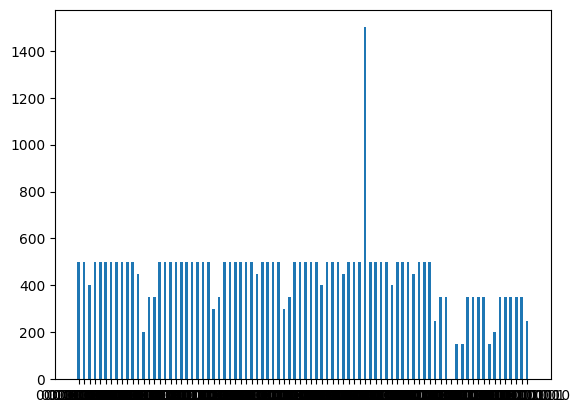

In [131]:
plt.bar(possible_sequence_cost.keys(),possible_sequence_cost.values(),width=0.5)
plt.show()

<h2>Compressive Sensing</h2>

In [166]:
#Sample from possible sequences (be careful not to take the solution already)
seq_sample = []
seq_sample_cost = []
for _ in range(30):
    seq = random.choice(possible_sequence)
    seq_sample.append(seq)
    seq_sample_cost.append(possible_sequence_cost[stringify(seq)])

In [213]:
def estimate_measurement(bit1,bit2,v1,v2):
    costs = []
    for seq,cost in zip(seq_sample,seq_sample_cost):
        if seq[bit1]==v1 and seq[bit2]==v2:
            costs.append(cost)
    if costs == []:
        return
    else:
        return np.sum(costs)

In [216]:
#All nearest neighbor cost approximated by average

y = []

for bit in range(9):
    # print(bit,bit+1)
    for v1 in range(2):
        for v2 in range(2):
            # print(v1,v2)
            res = estimate_measurement(bit,bit+1,v1,v2)
            if res!=None:
                y.append(res)

y


[5550,
 4200,
 2150,
 7700,
 1500,
 2700,
 4200,
 5000,
 2700,
 4550,
 2350,
 3000,
 2000,
 3000,
 4550,
 3500,
 850,
 4500,
 2000,
 3550,
 1850,
 5700,
 2350,
 2850,
 1000,
 4850,
 3700,
 1350,
 2000,
 3550,
 2650,
 4850,
 850]